<figure><figure>
    <center> <img src="./images/4.PNG"><center/>
</figure>

## Import Libraries

In [724]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Data Collection and Preprocessing

In [725]:
# load the dataset
loan_dataset = pd.read_csv("./Datasets/loan.csv")
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [726]:
# Number of rows and columns
loan_dataset.shape

(614, 13)

In [727]:
# Statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [728]:
# Check missing values
loan_dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [729]:
# Drop the missing values
loan_dataset =  loan_dataset.dropna()

In [730]:
loan_dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [731]:
loan_dataset.shape

(480, 13)

In [732]:
# Label encoding
loan_dataset.replace({"Loan_Status":{"N":0, "Y":1}}, inplace=True)

In [733]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [734]:
# Dependent column values
loan_dataset["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [735]:
# Replacig the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace="3+", value=4)

In [736]:
# Dependent values
loan_dataset["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

## Data Visualization

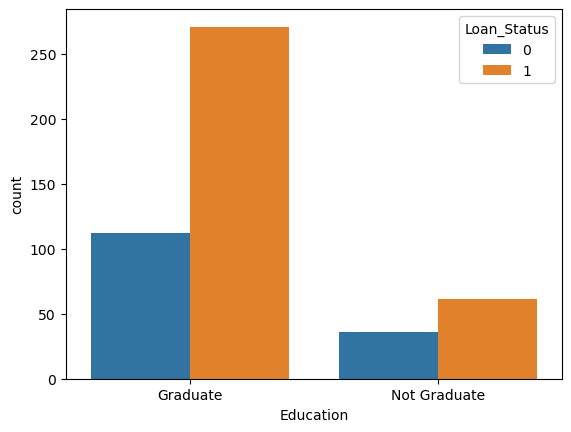

In [737]:
# Education and Loan Status
sns.countplot(data=loan_dataset, x="Education", hue="Loan_Status")
plt.show()

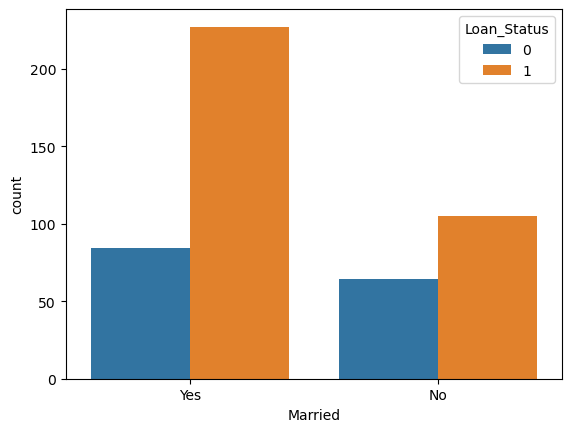

In [738]:
# Marital status and Loan Status
sns.countplot(data=loan_dataset, x="Married", hue="Loan_Status")
plt.show()

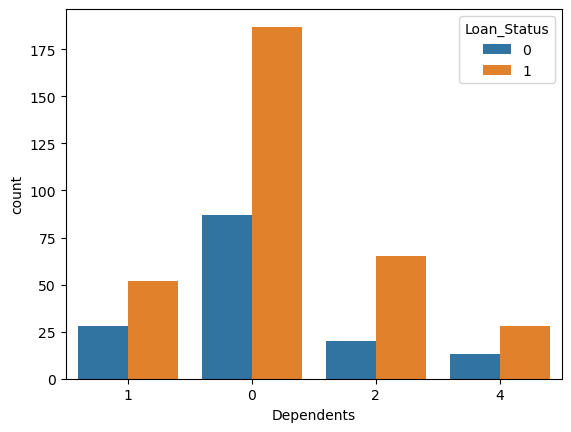

In [739]:
# Dependents and Loan Status
sns.countplot(data=loan_dataset, x="Dependents", hue="Loan_Status")
plt.show()

### Convert categorical columns to numerical values

In [740]:
# Convert categorical columns to numerical values
loan_dataset.replace({"Married":{"No":0, "Yes":1}, 
                      "Gender":{"Male":1, "Female":0}, 
                      "Self_Employed":{"No":0, "Yes":1},
                      "Property_Area":{"Rural":0, "Semiurban":1, "Urban":2},
                      "Education":{"Graduate":1, "Not Graduate":0}}, inplace=True)

In [741]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [742]:
# Separate the dataset into labels
x = loan_dataset.drop(columns=["Loan_ID", "Loan_Status"], axis=1)
y = loan_dataset["Loan_Status"]

In [743]:
y.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [744]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)

x = x_smote
y = y_smote

y.value_counts()

0    332
1    332
Name: Loan_Status, dtype: int64

In [745]:
# Split the data into train test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Train the Model
### SVM

In [746]:
svm = SVC()

In [747]:
svm.fit(x_train, y_train)

SVC()

In [748]:
y_pred = svm.predict(x_test)

In [749]:
accuracy_score(y_test, y_pred)

0.5789473684210527

In [750]:
confusion_matrix(y_test, y_pred)

array([[34, 31],
       [25, 43]], dtype=int64)

### Random Forest

In [751]:
rf = RandomForestClassifier()

In [752]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [753]:
y_pred_test = rf.predict(x_test)

In [754]:
y_pred_train = rf.predict(x_train)

In [755]:
print("Accuracy on training data: ", accuracy_score(y_train, y_pred_train))

Accuracy on training data:  1.0


In [756]:
print("Accuracy on testing data: ", accuracy_score(y_test, y_pred_test))

Accuracy on testing data:  0.849624060150376


In [757]:
confusion_matrix(y_test, y_pred_test)

array([[52, 13],
       [ 7, 61]], dtype=int64)

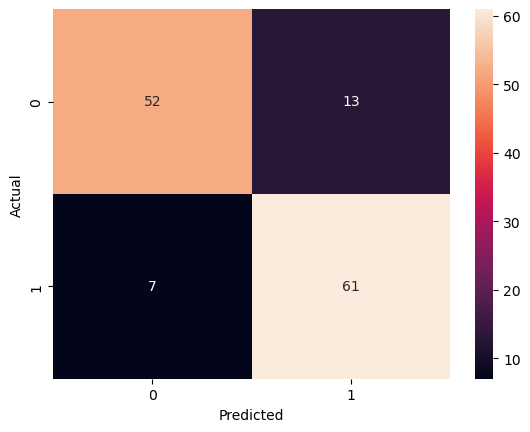

In [758]:
sns.heatmap(data=confusion_matrix(y_test, y_pred_test), annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Decision Tree

In [759]:
dt = DecisionTreeClassifier()

In [760]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [761]:
y_pred = dt.predict(x_test)

In [762]:
accuracy_score(y_test, y_pred)

0.7819548872180451

In [763]:
confusion_matrix(y_test, y_pred)

array([[56,  9],
       [20, 48]], dtype=int64)